# PART-3

Using the same dataset now to show the comparative behaviors of four different
document ranking models - 

a.) $TF-IDF$

b.) $BM25$

c.) $Language \hspace{1mm} Model$

d.) $LSI$ (use 50 latent dimensions for terms and documents)

For each case, mention the model you are using and corresponding assumptions. Use precision/Recall/MAP for performance measurements and tabulate the speed of execution for each model.

### Importing the required libraries

In [252]:
import numpy
import nltk
import pandas
import re

### Reading and Preprocessing the data

**Reading Data in Dataset File**

In [253]:
data = None
with open('Medical_Abstracts.txt', 'r') as f:
    data = f.read()

**Cleaning the data**

In [254]:
data = data.split('.I')[1:]

In [255]:
data = [d.split('.W')[1] for d in data]

In [256]:
# Split every line by \n
data = [d.split('\n') for d in data]

In [257]:
data[0]

['',
 'correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids .                                                           ',
 '  correlation coefficients have been determined between the levels of   ',
 'glucose and ffa in maternal and fetal plasma collected at delivery .    ',
 'significant correlations were obtained between the maternal and fetal   ',
 'glucose levels and the maternal and fetal ffa levels . from the size of ',
 'the correlation coefficients and the slopes of regression lines it      ',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at        ',
 'delivery is only slightly dependent upon the maternal level .           ',
 '']

In [258]:
data = [[d.strip() for d in d if d.strip() != ''] for d in data]

In [259]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids .',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery .',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels . from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level .']

**Preprocessing the data**

In [260]:
# Use Regex to clean all documents
data = [[re.sub(r'[^a-zA-Z0-9\s]', '', d) for d in d] for d in data]

In [261]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids ',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery ',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels  from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level ']

In [262]:
data = [[d.lower().strip() for d in d] for d in data]

In [263]:
data[0]

['correlation between maternal and fetal plasma levels of glucose and free',
 'fatty acids',
 'correlation coefficients have been determined between the levels of',
 'glucose and ffa in maternal and fetal plasma collected at delivery',
 'significant correlations were obtained between the maternal and fetal',
 'glucose levels and the maternal and fetal ffa levels  from the size of',
 'the correlation coefficients and the slopes of regression lines it',
 'appears that the fetal plasma glucose level at delivery is very strongly',
 'dependent upon the maternal level whereas the fetal ffa level at',
 'delivery is only slightly dependent upon the maternal level']

--> Data Seems Good

**Tokenizing the data**

In [264]:
for d in data[0]:
    print(d.split(' '))

['correlation', 'between', 'maternal', 'and', 'fetal', 'plasma', 'levels', 'of', 'glucose', 'and', 'free']
['fatty', 'acids']
['correlation', 'coefficients', 'have', 'been', 'determined', 'between', 'the', 'levels', 'of']
['glucose', 'and', 'ffa', 'in', 'maternal', 'and', 'fetal', 'plasma', 'collected', 'at', 'delivery']
['significant', 'correlations', 'were', 'obtained', 'between', 'the', 'maternal', 'and', 'fetal']
['glucose', 'levels', 'and', 'the', 'maternal', 'and', 'fetal', 'ffa', 'levels', '', 'from', 'the', 'size', 'of']
['the', 'correlation', 'coefficients', 'and', 'the', 'slopes', 'of', 'regression', 'lines', 'it']
['appears', 'that', 'the', 'fetal', 'plasma', 'glucose', 'level', 'at', 'delivery', 'is', 'very', 'strongly']
['dependent', 'upon', 'the', 'maternal', 'level', 'whereas', 'the', 'fetal', 'ffa', 'level', 'at']
['delivery', 'is', 'only', 'slightly', 'dependent', 'upon', 'the', 'maternal', 'level']


In [265]:
# Tokenize every document
data_tokenized = []
for d in data:
    d_word_paragraph = []
    for p in d:
        d_word_paragraph.append(p.split(' '))
    data_tokenized.append(d_word_paragraph)

In [266]:
data_tokenized[0]

[['correlation',
  'between',
  'maternal',
  'and',
  'fetal',
  'plasma',
  'levels',
  'of',
  'glucose',
  'and',
  'free'],
 ['fatty', 'acids'],
 ['correlation',
  'coefficients',
  'have',
  'been',
  'determined',
  'between',
  'the',
  'levels',
  'of'],
 ['glucose',
  'and',
  'ffa',
  'in',
  'maternal',
  'and',
  'fetal',
  'plasma',
  'collected',
  'at',
  'delivery'],
 ['significant',
  'correlations',
  'were',
  'obtained',
  'between',
  'the',
  'maternal',
  'and',
  'fetal'],
 ['glucose',
  'levels',
  'and',
  'the',
  'maternal',
  'and',
  'fetal',
  'ffa',
  'levels',
  '',
  'from',
  'the',
  'size',
  'of'],
 ['the',
  'correlation',
  'coefficients',
  'and',
  'the',
  'slopes',
  'of',
  'regression',
  'lines',
  'it'],
 ['appears',
  'that',
  'the',
  'fetal',
  'plasma',
  'glucose',
  'level',
  'at',
  'delivery',
  'is',
  'very',
  'strongly'],
 ['dependent',
  'upon',
  'the',
  'maternal',
  'level',
  'whereas',
  'the',
  'fetal',
  'ffa',
  

In [267]:
final_data = []
for d in data_tokenized:
    # Merge all lists in d
    final_doc = []
    for p in d:
        final_doc.extend(p)
    final_data.append(final_doc)

In [268]:
final_data[0]

['correlation',
 'between',
 'maternal',
 'and',
 'fetal',
 'plasma',
 'levels',
 'of',
 'glucose',
 'and',
 'free',
 'fatty',
 'acids',
 'correlation',
 'coefficients',
 'have',
 'been',
 'determined',
 'between',
 'the',
 'levels',
 'of',
 'glucose',
 'and',
 'ffa',
 'in',
 'maternal',
 'and',
 'fetal',
 'plasma',
 'collected',
 'at',
 'delivery',
 'significant',
 'correlations',
 'were',
 'obtained',
 'between',
 'the',
 'maternal',
 'and',
 'fetal',
 'glucose',
 'levels',
 'and',
 'the',
 'maternal',
 'and',
 'fetal',
 'ffa',
 'levels',
 '',
 'from',
 'the',
 'size',
 'of',
 'the',
 'correlation',
 'coefficients',
 'and',
 'the',
 'slopes',
 'of',
 'regression',
 'lines',
 'it',
 'appears',
 'that',
 'the',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'at',
 'delivery',
 'is',
 'very',
 'strongly',
 'dependent',
 'upon',
 'the',
 'maternal',
 'level',
 'whereas',
 'the',
 'fetal',
 'ffa',
 'level',
 'at',
 'delivery',
 'is',
 'only',
 'slightly',
 'dependent',
 'upon',
 'the',
 'mat

**Checking Number of Documents**

In [269]:
len(final_data)

492

--> PERFECT

**Remove Stopwords**

In [270]:
# nltk.download('stopwords')

In [271]:
# Remove Stopwords using NLTK
english_stopwords = nltk.corpus.stopwords.words('english')

In [272]:
final_data = [[w for w in d if w not in english_stopwords] for d in final_data]

In [273]:
final_data[0]

['correlation',
 'maternal',
 'fetal',
 'plasma',
 'levels',
 'glucose',
 'free',
 'fatty',
 'acids',
 'correlation',
 'coefficients',
 'determined',
 'levels',
 'glucose',
 'ffa',
 'maternal',
 'fetal',
 'plasma',
 'collected',
 'delivery',
 'significant',
 'correlations',
 'obtained',
 'maternal',
 'fetal',
 'glucose',
 'levels',
 'maternal',
 'fetal',
 'ffa',
 'levels',
 '',
 'size',
 'correlation',
 'coefficients',
 'slopes',
 'regression',
 'lines',
 'appears',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'delivery',
 'strongly',
 'dependent',
 'upon',
 'maternal',
 'level',
 'whereas',
 'fetal',
 'ffa',
 'level',
 'delivery',
 'slightly',
 'dependent',
 'upon',
 'maternal',
 'level']

**Lemmatization**

In [274]:
# nltk.download('wordnet')

In [275]:
# Lemmatize using NLTK
lemmatizer = nltk.stem.WordNetLemmatizer()

In [276]:
final_data = [[lemmatizer.lemmatize(w) for w in d] for d in final_data]

In [277]:
final_data[0]

['correlation',
 'maternal',
 'fetal',
 'plasma',
 'level',
 'glucose',
 'free',
 'fatty',
 'acid',
 'correlation',
 'coefficient',
 'determined',
 'level',
 'glucose',
 'ffa',
 'maternal',
 'fetal',
 'plasma',
 'collected',
 'delivery',
 'significant',
 'correlation',
 'obtained',
 'maternal',
 'fetal',
 'glucose',
 'level',
 'maternal',
 'fetal',
 'ffa',
 'level',
 '',
 'size',
 'correlation',
 'coefficient',
 'slope',
 'regression',
 'line',
 'appears',
 'fetal',
 'plasma',
 'glucose',
 'level',
 'delivery',
 'strongly',
 'dependent',
 'upon',
 'maternal',
 'level',
 'whereas',
 'fetal',
 'ffa',
 'level',
 'delivery',
 'slightly',
 'dependent',
 'upon',
 'maternal',
 'level']

In [278]:
# Remove '' from all documents
final_data = [[w for w in d if w != ''] for d in final_data]

In [279]:
final_data

[['correlation',
  'maternal',
  'fetal',
  'plasma',
  'level',
  'glucose',
  'free',
  'fatty',
  'acid',
  'correlation',
  'coefficient',
  'determined',
  'level',
  'glucose',
  'ffa',
  'maternal',
  'fetal',
  'plasma',
  'collected',
  'delivery',
  'significant',
  'correlation',
  'obtained',
  'maternal',
  'fetal',
  'glucose',
  'level',
  'maternal',
  'fetal',
  'ffa',
  'level',
  'size',
  'correlation',
  'coefficient',
  'slope',
  'regression',
  'line',
  'appears',
  'fetal',
  'plasma',
  'glucose',
  'level',
  'delivery',
  'strongly',
  'dependent',
  'upon',
  'maternal',
  'level',
  'whereas',
  'fetal',
  'ffa',
  'level',
  'delivery',
  'slightly',
  'dependent',
  'upon',
  'maternal',
  'level'],
 ['change',
  'nucleic',
  'acid',
  'phospholipid',
  'level',
  'liver',
  'course',
  'fetal',
  'postnatal',
  'development',
  'followed',
  'evolution',
  'dna',
  'rna',
  'pl',
  'liver',
  'rat',
  'foeti',
  'removed',
  'fifteenth',
  'twentyfirst

--> Here we now have our Data Preprocessed

### Building an Inverted Index

In [280]:
# Inverted Index
inv_index = {}

In [281]:
for i in range(len(final_data)):
    for w in set(final_data[i]):
        if w not in inv_index:
            inv_index[w] = [i]
        else:
            inv_index[w].append(i)

In [282]:
len(inv_index)

8299

In [283]:
list(inv_index.keys())[:10]

['acid',
 'obtained',
 'slope',
 'delivery',
 'coefficient',
 'collected',
 'maternal',
 'appears',
 'glucose',
 'fetal']

In [284]:
# Remove '' from the dictionary
try:
    inv_index.pop('')
except:
    pass

In [285]:
inv_index['cancer']

[50,
 57,
 62,
 65,
 66,
 107,
 140,
 147,
 148,
 150,
 154,
 172,
 177,
 206,
 207,
 208,
 222,
 226,
 227,
 228,
 246,
 258,
 341,
 393,
 394,
 403,
 405,
 406,
 420,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 449,
 450,
 451,
 452,
 483]

In [286]:
# Save the inverted index to a pickle file
import pickle

with open('inv_index.pickle_part3', 'wb') as f:
    pickle.dump(inv_index, f)

Seems about right!

### (a). TF-IDF

We will use the Augmented TF-IDF model for this task. The Augmented TF-IDF model is a variant of the TF-IDF model which takes into account the length of the document. The formula for the Augmented TF-IDF model is given below:

$$TF(t, d) = 0.5 + \dfrac{0.5 \times f(t, d)}{\text{max-frequency of any word in } d}$$

$$IDF(t) = \log \left(\dfrac{\text{Number of Docs}}{df(t)}\right)$$

In [287]:
import scipy

class TfIdfModel:
    
    def __init__(self, inv_index, data):

        self.inv_index = inv_index.copy()
        self.data = data.copy()
        
        self.num_docs = len(self.data)
        
        # Calculate the document frequency for each word
        self.doc_freq = {}
        for w in self.inv_index:
            self.doc_freq[w] = len(self.inv_index[w])
        
        # Calculate the Term-Doc Frequencies
        self.term_doc_freq = {}
        for i in range(self.num_docs):

            self.term_doc_freq[i] = {}
            
            # Initialize all values to 0
            for w in self.inv_index:
                self.term_doc_freq[i][w] = 0
            
            # Calculate the term frequency for each word in the document
            for w in self.data[i]:
                self.term_doc_freq[i][w] += 1
        
        # Calculate Maximum Term Frequency for each document
        self.max_term_freq = {}
        
        for i in range(self.num_docs):
            self.max_term_freq[i] = max(self.term_doc_freq[i].values())
        
        # Calculate the TF-IDF for each word in each document
        self.tf_idf = {}
        for i in range(self.num_docs):

            self.tf_idf[i] = {}
            
            for w in self.inv_index:
                # Augmented Variant of TF-IDF
                self.tf_idf[i][w] = (0.5 + 0.5 * (self.term_doc_freq[i][w] / self.max_term_freq[i])) * (numpy.log(self.num_docs / self.doc_freq[w]))

    def get_tf_idf(self, word, doc_id):
        return self.tf_idf[doc_id][word]
    
    def get_feature_vector_by_id(self, doc_id):
        return [self.tf_idf[doc_id][w] for w in self.inv_index]

    def get_query_vector(self, query):
        query_vector = []
        for w in self.inv_index:
            if w in query:
                # Find TF of w
                tf = query.count(w)
                tf = 0.5 + 0.5 * (tf / max([query.count(q) for q in query]))
                # Find IDF of w
                idf = numpy.log(self.num_docs / self.doc_freq[w])
                query_vector.append(tf * idf)
            else:
                query_vector.append(0)
        return query_vector
    
    def get_top_k_docs(self, query, k):
        query_vector = self.get_query_vector(query)
        scores = []
        for i in range(self.num_docs):
            doc_vector = self.get_feature_vector_by_id(i)
            scores.append((i, 1 - scipy.spatial.distance.cosine(query_vector, doc_vector)))
        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        return scores[:k]

In [288]:
# Build the TF-IDF Model
TF_IDF_Model = TfIdfModel(inv_index, final_data)

In [289]:
# Query the TF-IDF Model
query = ['cancer', 'tumor', 'treatment']

In [290]:
query_vector = TF_IDF_Model.get_query_vector(query)

In [291]:
len(query_vector)

8299

In [292]:
# Get the top 10 documents for the query
TF_IDF_Model.get_top_k_docs(query, 10)

[(246, 0.012442381564247151),
 (207, 0.01223242380533962),
 (154, 0.012157168377142757),
 (399, 0.011916771091214917),
 (153, 0.011910287668422503),
 (441, 0.011809911671390672),
 (150, 0.011712015769419382),
 (447, 0.011690929581766984),
 (107, 0.011484815479048449),
 (140, 0.011101031415528761)]

## (b). BM25 - Okapi

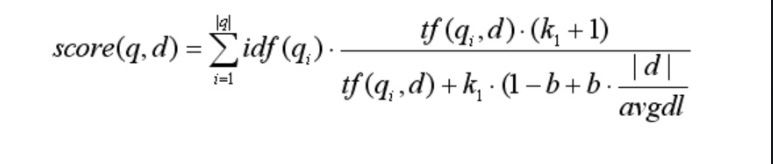

For Implementation Purposes, we will use the **rank_bm25** Library

In [293]:
# Import Okapi BM25 Model
from rank_bm25 import BM25Okapi

In [294]:
# Build the Okapi BM25 Model
BM25_Model = BM25Okapi(final_data)

Function to get top-k results from the corpus.

In [295]:
def get_top_k_docs(query, k):
    scores = BM25_Model.get_scores(query)
    scores = [(i, s) for i, s in enumerate(scores)]
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return scores[:k]

Calculating score of a Document

In [296]:
scores = get_top_k_docs(query, 10)

In [297]:
scores

[(246, 7.9615909299491765),
 (154, 7.678644001687846),
 (150, 7.5259865327891635),
 (107, 7.503901493344566),
 (441, 7.059524090585768),
 (447, 6.431738306791448),
 (207, 6.2413029087731795),
 (341, 6.106739647471404),
 (57, 5.968296845736136),
 (439, 5.843242039651355)]

## (c). Language Model

For Language Model, we will use the Unigram Language Model

In [298]:
class UnigramLanguageModel:
    
    def __init__(self, data):
        
        self.data = data.copy()
        self.num_docs = len(self.data)
        
        # Term-Document Frequency Matrix
        self.term_doc_freq = {}
        for i in range(self.num_docs):
            self.term_doc_freq[i] = {}
            for w in self.data[i]:
                if w not in self.term_doc_freq[i]:
                    self.term_doc_freq[i][w] = 1
                else:
                    self.term_doc_freq[i][w] += 1
        
        # Smoothening: Add 1 to all values
        for i in range(self.num_docs):
            for w in self.term_doc_freq[i]:
                self.term_doc_freq[i][w] += 1
        
        
        # Probability Matrix
        self.prob_matrix = {}
        for i in range(self.num_docs):
            self.prob_matrix[i] = {}
            for w in self.term_doc_freq[i]:
                self.prob_matrix[i][w] = self.term_doc_freq[i][w] / sum(self.term_doc_freq[i].values())
        
    # Calculate the probability of a query given a document
    def get_prob(self, query, doc_id):
        prob = 1
        for w in query:
            if w in self.prob_matrix[doc_id]:
                prob *= self.prob_matrix[doc_id][w]
            else:
                # Smoothening: Assume Probablity of 10^-5
                prob *= 10**-5
        return prob
    
    # Get Top K Documents for a query
    def get_top_k_docs(self, query, k):
        probs = []
        for i in range(self.num_docs):
            probs.append((self.get_prob(query, i), i))
        probs.sort(reverse=True)
        return probs[:k]

In [299]:
# Build the Unigram Language Model
Unigram_Language_Model = UnigramLanguageModel(final_data)

In [300]:
# Query the Unigram Language Model
query = ['cancer', 'tumor', 'treatment']

In [301]:
# Get Top 10 Documents
top_10_docs = Unigram_Language_Model.get_top_k_docs(query, 10)

In [302]:
top_10_docs

[(7.1005917159763325e-09, 246),
 (6.147121098285637e-09, 441),
 (5.876951331496787e-09, 107),
 (5.655575454802527e-09, 154),
 (4.72411186696901e-09, 150),
 (4.2165626581211e-09, 447),
 (2.8246592754748958e-09, 403),
 (2.666666666666667e-09, 341),
 (2.5969529085872576e-09, 438),
 (2.0613775155247493e-09, 57)]

In [303]:
final_data[246]

['tumor',
 'scanning',
 'radioactive',
 'cesium',
 'fourteen',
 'patient',
 'cancer',
 'scanned',
 '10',
 'minute',
 '48',
 'hour',
 'injection',
 'radioactive',
 'c',
 'satisfactory',
 'scan',
 'tumor',
 'obtained',
 'seven',
 'positive',
 'scan',
 'obtained',
 'large',
 'superficial',
 'tumor',
 'pulmonary',
 'lymphoma',
 'carcinoma',
 'upper',
 'third',
 'esophagus',
 'negative',
 'scan',
 'abdominal',
 'tumor',
 'correlation',
 'made',
 'data',
 'obtained',
 'external',
 'counting',
 'well',
 'scintillation',
 'counting',
 'biopsy',
 'specimen',
 'two',
 'mode',
 'uptake',
 'suggested',
 'early',
 'uptake',
 'due',
 'vascularity',
 'probably',
 'proportional',
 'stable',
 'cesium',
 'content',
 'b',
 'later',
 'uptake',
 'based',
 'upon',
 'greater',
 'alkali',
 'metal',
 'content',
 'tumor',
 'normal',
 'tissue']

## (d). LSI

**In LSI, we will use 50 latent dimensions for terms and documents**

In [304]:
from gensim import corpora, models

# Prepare the documents
tokenized_docs = final_data
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=50)

# Get the LSI vectors for the documents
lsi_vectors = lsi_model[corpus]

In [305]:
len(lsi_vectors)

492

Defining a function to get top-k results from the corpus

In [306]:
def get_top_k_docs_lsi(query, k):

    query_bow = dictionary.doc2bow(query)

    query_lsi = lsi_model[query_bow]
    
    query_lsi = [x[1] for x in query_lsi]
    
    # If query is shorter than 50 words, pad it with 0s
    while len(query_lsi) < 50:
        query_lsi.append(0)

    scores = []
    for i in range(len(lsi_vectors)):
        doc_lsi = [x[1] for x in lsi_vectors[i]]
        scores.append((i, 1 - scipy.spatial.distance.cosine(query_lsi, doc_lsi)))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return scores[:k]

Trying out the LSI Model

In [307]:
query = ['cancer', 'tumor', 'treatment']

get_top_k_docs_lsi(query, 10)

[(246, 0.6060194262547766),
 (150, 0.601840651353301),
 (154, 0.5935852419460466),
 (399, 0.575597665880489),
 (447, 0.5497639929359349),
 (351, 0.5393119571065504),
 (441, 0.5387447922420743),
 (450, 0.5360588241410024),
 (228, 0.5170390373405143),
 (439, 0.5139154156748712)]

## **Comparison of the Models**

**QUERIES**

In [308]:
QUERIES={}
QUERIES['constipation']=[[203,251,372],[203,372],[203,251,372,442]]
QUERIES['influenza']=[[59],[59,469],[59,71,469]]
QUERIES['cough']=[[372,421],[372,83,126,],[372,83,126,421]]
QUERIES['muscle ache']=[[37,65,76,126,343],[37,65,76,117,126,387],[37,65,76,83,100,117,126,206,277,343]]
QUERIES['vomiting']=[[203,442],[203,372,442],[203,372,442]]
QUERIES['hepatitis']=[[16,376],[16,376],[16,368,376]]
QUERIES['diarrhea']=[[372,442],[372,203,372,442],[372,203,372,442]]
QUERIES['cold']=[[83,126,421],[82,83,126,421],[41,82,83,126]]
QUERIES['paracetamol ibuprofen']=[[216,200],[216,200,365,356],[216,200,205,356,214]]
QUERIES['common cold']=[[83,126,421,372,28,365],[82,83,126,421,372,28],[41,82,83,126]]
QUERIES['paracetamol']=[[28,214,364,83,126,421,372,28,365],[28,214,364,421,372,28],[28,214,364,41,82,83,126]]
QUERIES['ibuprofen']=[[200,139,216],[200,356,139,216],[200,205,216]]
QUERIES['fever']=[[28,214,365,251],[28,214,365,251],[28,214,365]]
QUERIES['virus']=[[275,372,399,402,403,59,71,371],[275,372,399,400,402,403,475,59,71],[275,372,400,403,475,71,371]]
QUERIES['hepatitis virus']=[[368,376,16,401],[368,376,16,399,401,402],[368,376,16,372,399,402]]
QUERIES['sore throat']=[[477,483,71,177,214,252],[477,483,71,177,198,214],[477,71,177,198]]
QUERIES['headache']=[[216,421,214,28,83,126,421,372,28,365,61,69,71],[216,421,214,365,28,82,83,126,421,372,28,61,62,69,71],[216,421,365,28,41,82,83,126,61,62,71]]
QUERIES['back pain']=[[378,162,301,235,413,356],[378,162,235,301,235,348,356],[378,235,301,235,356]]
QUERIES['stomach ache']=[[391,372,442],[391,200,372,203,372,442],[391,200,372,203,372,442]]
QUERIES['nausea']=[[368,442,203,442],[368,442,203,372,442],[368,442,203,372,442]]

# Taking Union
for i in QUERIES:
    QUERIES[i]=list(set(QUERIES[i][0]+QUERIES[i][1]+QUERIES[i][2]))

In [309]:
QUERIES

{'constipation': [442, 203, 372, 251],
 'influenza': [59, 469, 71],
 'cough': [83, 372, 421, 126],
 'muscle ache': [65, 387, 100, 37, 76, 206, 83, 117, 277, 343, 126],
 'vomiting': [442, 203, 372],
 'hepatitis': [16, 376, 368],
 'diarrhea': [442, 203, 372],
 'cold': [421, 41, 82, 83, 126],
 'paracetamol ibuprofen': [356, 200, 205, 365, 214, 216],
 'common cold': [421, 41, 365, 82, 83, 372, 28, 126],
 'paracetamol': [421, 41, 364, 365, 82, 83, 372, 214, 28, 126],
 'ibuprofen': [356, 200, 139, 205, 216],
 'fever': [251, 28, 365, 214],
 'virus': [71, 399, 400, 402, 275, 372, 403, 371, 475, 59],
 'hepatitis virus': [399, 368, 16, 401, 402, 372, 376],
 'sore throat': [483, 198, 71, 177, 214, 252, 477],
 'headache': [421, 69, 71, 41, 365, 82, 83, 372, 214, 216, 62, 28, 61, 126],
 'back pain': [162, 356, 235, 301, 378, 348, 413],
 'stomach ache': [391, 200, 203, 372, 442],
 'nausea': [368, 442, 203, 372]}

In [310]:
# Subtract 1 from all doc_ids in queries
for i in QUERIES:
    QUERIES[i]=[x-1 for x in QUERIES[i]]

#### For all Queries we will run each model 10 times to get the average values for (Precision, Recall and MAP)

### **Results**

Let's Use Our Models one by one and see the results on these queries 10 times each

**1. TF-IDF**

In [311]:
import time

In [312]:
# 1. TF-IDF Model
tf_idf_results = {}

for i in QUERIES:

    print(i)
    
    q = lemmatizer.lemmatize(i)
    
    tf_idf_results[i] = []

    for j in range(10):

        t0 = time.time()
        output = TF_IDF_Model.get_top_k_docs(q.split(), 10)
        t1 = time.time()

        # Take only 0th index of the output
        output = [o[0] for o in output]
        tf_idf_results[i].append((output, t1-t0))

    print()

constipation

influenza

cough

muscle ache

vomiting

hepatitis

diarrhea

cold

paracetamol ibuprofen

common cold

paracetamol

ibuprofen

fever

virus

hepatitis virus

sore throat

headache

back pain

stomach ache

nausea



In [313]:
tf_idf_results

{'constipation': [([202, 491, 0, 430, 253, 95, 480, 237, 303, 363],
   0.5051813125610352),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5415832996368408),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5600030422210693),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.509666919708252),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5082097053527832),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5024707317352295),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.4811723232269287),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5115859508514404),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5951380729675293),
  ([202, 491, 0, 430, 253, 95, 480, 237, 303, 363], 0.5608484745025635)],
 'influenza': [([58, 70, 491, 0, 430, 253, 95, 480, 237, 303],
   0.49437451362609863),
  ([58, 70, 491, 0, 430, 253, 95, 480, 237, 303], 0.5238873958587646),
  ([58, 70, 491, 0, 430, 253, 95, 480, 237, 303], 0.5572257041931152),
  ([58, 70, 491, 0, 4

**2. BM25**

In [314]:
# 2. BM25 Model
bm25_results = {}

for i in QUERIES:
    
    print(i)
    
    q = lemmatizer.lemmatize(i)
    
    bm25_results[i] = []

    for j in range(10):

        t0 = time.time()
        output = get_top_k_docs(q.split(), 10)
        t1 = time.time()

        output = [o[0] for o in output]
        bm25_results[i].append((output, t1-t0))

    print()

constipation

influenza

cough

muscle ache

vomiting

hepatitis

diarrhea

cold

paracetamol ibuprofen

common cold

paracetamol

ibuprofen

fever

virus

hepatitis virus

sore throat

headache

back pain

stomach ache

nausea



In [315]:
bm25_results

{'constipation': [([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0009758472442626953),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0010037422180175781),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0009937286376953125),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0),
  ([202, 0, 1, 2, 3, 4, 5, 6, 7, 8], 0.0)],
 'influenza': [([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0010018348693847656),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0),
  ([58, 70, 0, 1, 2, 3, 4, 5, 6, 7], 0.0)],
 'cough': [([371, 0, 1, 2, 3, 4, 5, 6

**3. Language Model**

In [316]:
# 3. Unigram Language Model

unigram_results = {}

for i in QUERIES:
    
    print(i)
    
    q = lemmatizer.lemmatize(i)
    
    unigram_results[i] = []

    for j in range(10):

        t0 = time.time()
        output = Unigram_Language_Model.get_top_k_docs(q.split(), 10)
        t1 = time.time()

        output = [o[1] for o in output]
        unigram_results[i].append((output, t1-t0))

    print()

constipation

influenza

cough

muscle ache

vomiting

hepatitis

diarrhea

cold

paracetamol ibuprofen

common cold

paracetamol

ibuprofen

fever

virus

hepatitis virus

sore throat

headache

back pain

stomach ache

nausea



In [317]:
unigram_results

{'constipation': [([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0),
  ([202, 491, 490, 489, 488, 487, 486, 485, 484, 483], 0.0)],
 'influenza': [([58, 70, 491, 490, 489, 488, 487, 486, 485, 484], 0.0),
  ([58, 70, 491, 490, 489, 488, 487, 486, 485, 484], 0.0),
  ([58, 70, 491, 490, 489, 488, 487, 486, 485, 484], 0.0015065670013427734),
  ([58, 70, 491, 490, 489, 488, 487, 486, 485, 484], 0.0),
  ([58, 70, 491, 490, 489, 488, 487, 486, 485, 484], 0.0),
  ([58, 70, 491, 490, 489, 488, 487, 486, 485, 

**4. LSI**

In [318]:
# 4. LSI Model

lsi_results = {}

for i in QUERIES:
    
    print(i)
    
    q = lemmatizer.lemmatize(i)
    
    lsi_results[i] = []

    for j in range(10):

        t0 = time.time()
        output = get_top_k_docs_lsi(q.split(), 10)
        t1 = time.time()

        output = [o[0] for o in output]
        lsi_results[i].append((output, t1-t0))

    print()

constipation

influenza

cough

muscle ache

vomiting

hepatitis

diarrhea

cold

paracetamol ibuprofen

common cold

paracetamol

ibuprofen

fever

virus

hepatitis virus

sore throat

headache

back pain

stomach ache

nausea



In [319]:
lsi_results

{'constipation': [([202, 199, 483, 487, 490, 203, 35, 489, 96, 348],
   0.05554485321044922),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.04277324676513672),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.04159045219421387),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.040705204010009766),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.04305696487426758),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.045577049255371094),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.041837453842163086),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.04011893272399902),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.04095721244812012),
  ([202, 199, 483, 487, 490, 203, 35, 489, 96, 348], 0.0407719612121582)],
 'influenza': [([58, 280, 276, 68, 229, 69, 70, 281, 159, 162],
   0.0415034294128418),
  ([58, 280, 276, 68, 229, 69, 70, 281, 159, 162], 0.041706085205078125),
  ([58, 280, 276, 68, 229, 69, 70, 281, 159, 162], 0.0405442714691

### Calculating Precision, Recall and Average Precision for each query

In [320]:
def get_precision(actual, predicted):
    return len(set(actual) & set(predicted))/len(predicted)

def get_recall(actual, predicted):
    return len(set(actual) & set(predicted))/len(actual)

def get_ap(actual, predicted):
    return sum([get_precision(actual, predicted[:i+1]) for i in range(len(predicted))])/len(predicted)

In [321]:
def get_metrics(method_results, QUERIES):
    
    method_precision = {}
    method_recall = {}
    method_ap = {}
    method_avg_time = {}

    for i in QUERIES:
        
        method_precision[i] = []
        method_recall[i] = []
        method_ap[i] = []
        method_avg_time[i] = []

        for j in method_results[i]:
            method_precision[i].append(get_precision(QUERIES[i], j[0]))
            method_recall[i].append(get_recall(QUERIES[i], j[0]))
            method_ap[i].append(get_ap(QUERIES[i], j[0]))
            method_avg_time[i].append(j[1])
        
        method_precision[i] = sum(method_precision[i])/len(method_precision[i])
        method_recall[i] = sum(method_recall[i])/len(method_recall[i])
        method_ap[i] = sum(method_ap[i])/len(method_ap[i])
        method_avg_time[i] = sum(method_avg_time[i])/len(method_avg_time[i])
        
        # print("Query:", i)
        # print("Precision:", method_precision[i])
        # print("Recall:", method_recall[i])
        # print("AP:", method_ap[i])
        # print("Average Time:", method_avg_time[i])
        # print()
    
    return method_precision, method_recall, method_ap, method_avg_time

**1. TF-IDF**

In [322]:
# 1. TF-IDF Model
tf_idf_precision, tf_idf_recall, tf_idf_ap, tf_idf_avg_time = get_metrics(tf_idf_results, QUERIES)

In [323]:
tf_idf_precision

{'constipation': 0.09999999999999999,
 'influenza': 0.19999999999999998,
 'cough': 0.09999999999999999,
 'muscle ache': 0.9000000000000001,
 'vomiting': 0.29999999999999993,
 'hepatitis': 0.29999999999999993,
 'diarrhea': 0.09999999999999999,
 'cold': 0.39999999999999997,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.5,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.29999999999999993,
 'virus': 0.39999999999999997,
 'hepatitis virus': 0.29999999999999993,
 'sore throat': 0.0,
 'headache': 0.09999999999999999,
 'back pain': 0.19999999999999998,
 'stomach ache': 0.09999999999999999,
 'nausea': 0.19999999999999998}

In [324]:
tf_idf_recall

{'constipation': 0.25,
 'influenza': 0.6666666666666667,
 'cough': 0.25,
 'muscle ache': 0.8181818181818181,
 'vomiting': 1.0,
 'hepatitis': 1.0,
 'diarrhea': 0.33333333333333337,
 'cold': 0.7999999999999999,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.625,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.75,
 'virus': 0.39999999999999997,
 'hepatitis virus': 0.4285714285714285,
 'sore throat': 0.0,
 'headache': 0.07142857142857141,
 'back pain': 0.28571428571428564,
 'stomach ache': 0.19999999999999998,
 'nausea': 0.5}

In [325]:
tf_idf_ap

{'constipation': 0.2928968253968254,
 'influenza': 0.48579365079365083,
 'cough': 0.2928968253968254,
 'muscle ache': 0.890436507936508,
 'vomiting': 0.6286904761904761,
 'hepatitis': 0.6286904761904761,
 'diarrhea': 0.2928968253968254,
 'cold': 0.7382539682539682,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.5726984126984125,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.6286904761904761,
 'virus': 0.3756349206349206,
 'hepatitis virus': 0.4957936507936508,
 'sore throat': 0.0,
 'headache': 0.2928968253968254,
 'back pain': 0.43579365079365073,
 'stomach ache': 0.2928968253968254,
 'nausea': 0.48579365079365083}

In [326]:
tf_idf_avg_time

{'constipation': 0.5275859832763672,
 'influenza': 0.5159369468688965,
 'cough': 0.4864033222198486,
 'muscle ache': 0.5074435234069824,
 'vomiting': 0.47594144344329836,
 'hepatitis': 0.4827893257141113,
 'diarrhea': 0.4994565725326538,
 'cold': 0.5218963146209716,
 'paracetamol ibuprofen': 0.46948795318603515,
 'common cold': 0.48876638412475587,
 'paracetamol': 0.495503306388855,
 'ibuprofen': 0.5378607511520386,
 'fever': 0.5956583499908448,
 'virus': 0.836418890953064,
 'hepatitis virus': 0.8764089107513428,
 'sore throat': 0.4871807098388672,
 'headache': 0.5052866697311401,
 'back pain': 0.5119493484497071,
 'stomach ache': 0.49282174110412597,
 'nausea': 0.4902941226959229}

**2. BM25**

In [327]:
# 2. BM25 Model
bm25_precision, bm25_recall, bm25_ap, bm25_avg_time = get_metrics(bm25_results, QUERIES)

In [328]:
bm25_precision

{'constipation': 0.09999999999999999,
 'influenza': 0.19999999999999998,
 'cough': 0.09999999999999999,
 'muscle ache': 0.7999999999999999,
 'vomiting': 0.29999999999999993,
 'hepatitis': 0.29999999999999993,
 'diarrhea': 0.09999999999999999,
 'cold': 0.39999999999999997,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.5,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.29999999999999993,
 'virus': 0.29999999999999993,
 'hepatitis virus': 0.19999999999999998,
 'sore throat': 0.0,
 'headache': 0.09999999999999999,
 'back pain': 0.19999999999999998,
 'stomach ache': 0.09999999999999999,
 'nausea': 0.19999999999999998}

In [329]:
bm25_recall

{'constipation': 0.25,
 'influenza': 0.6666666666666667,
 'cough': 0.25,
 'muscle ache': 0.7272727272727274,
 'vomiting': 1.0,
 'hepatitis': 1.0,
 'diarrhea': 0.33333333333333337,
 'cold': 0.7999999999999999,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.625,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.75,
 'virus': 0.29999999999999993,
 'hepatitis virus': 0.28571428571428564,
 'sore throat': 0.0,
 'headache': 0.07142857142857141,
 'back pain': 0.28571428571428564,
 'stomach ache': 0.19999999999999998,
 'nausea': 0.5}

In [330]:
bm25_ap

{'constipation': 0.2928968253968254,
 'influenza': 0.48579365079365083,
 'cough': 0.2928968253968254,
 'muscle ache': 0.8804365079365077,
 'vomiting': 0.6286904761904761,
 'hepatitis': 0.6286904761904761,
 'diarrhea': 0.2928968253968254,
 'cold': 0.7382539682539682,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.456031746031746,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.6286904761904761,
 'virus': 0.32535714285714284,
 'hepatitis virus': 0.48579365079365083,
 'sore throat': 0.0,
 'headache': 0.2928968253968254,
 'back pain': 0.43579365079365073,
 'stomach ache': 0.2928968253968254,
 'nausea': 0.48579365079365083}

In [331]:
bm25_avg_time

{'constipation': 0.00029733180999755857,
 'influenza': 0.00010018348693847656,
 'cough': 0.00020356178283691405,
 'muscle ache': 0.0001964569091796875,
 'vomiting': 0.00020251274108886718,
 'hepatitis': 9.934902191162109e-05,
 'diarrhea': 9.97781753540039e-05,
 'cold': 9.822845458984375e-05,
 'paracetamol ibuprofen': 0.00020084381103515624,
 'common cold': 0.00019986629486083983,
 'paracetamol': 0.00010175704956054688,
 'ibuprofen': 0.00010006427764892578,
 'fever': 0.00010030269622802734,
 'virus': 0.00019807815551757811,
 'hepatitis virus': 0.00019991397857666016,
 'sore throat': 0.00010187625885009766,
 'headache': 9.992122650146485e-05,
 'back pain': 0.0002088308334350586,
 'stomach ache': 0.00013511180877685548,
 'nausea': 0.00020236968994140624}

**3. Language Model**

In [332]:
# 3. Unigram Language Model
unigram_precision, unigram_recall, unigram_ap, unigram_avg_time = get_metrics(unigram_results, QUERIES)

In [333]:
unigram_precision

{'constipation': 0.09999999999999999,
 'influenza': 0.19999999999999998,
 'cough': 0.09999999999999999,
 'muscle ache': 0.9000000000000001,
 'vomiting': 0.29999999999999993,
 'hepatitis': 0.29999999999999993,
 'diarrhea': 0.09999999999999999,
 'cold': 0.39999999999999997,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.29999999999999993,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.29999999999999993,
 'virus': 0.39999999999999997,
 'hepatitis virus': 0.19999999999999998,
 'sore throat': 0.09999999999999999,
 'headache': 0.09999999999999999,
 'back pain': 0.19999999999999998,
 'stomach ache': 0.09999999999999999,
 'nausea': 0.19999999999999998}

In [334]:
unigram_recall

{'constipation': 0.25,
 'influenza': 0.6666666666666667,
 'cough': 0.25,
 'muscle ache': 0.8181818181818181,
 'vomiting': 1.0,
 'hepatitis': 1.0,
 'diarrhea': 0.33333333333333337,
 'cold': 0.7999999999999999,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.375,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.75,
 'virus': 0.39999999999999997,
 'hepatitis virus': 0.28571428571428564,
 'sore throat': 0.14285714285714282,
 'headache': 0.07142857142857141,
 'back pain': 0.28571428571428564,
 'stomach ache': 0.19999999999999998,
 'nausea': 0.5}

In [335]:
unigram_ap

{'constipation': 0.2928968253968254,
 'influenza': 0.48579365079365083,
 'cough': 0.2928968253968254,
 'muscle ache': 0.890436507936508,
 'vomiting': 0.6286904761904761,
 'hepatitis': 0.6286904761904761,
 'diarrhea': 0.2928968253968254,
 'cold': 0.7382539682539682,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.18650793650793648,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.6286904761904761,
 'virus': 0.4520238095238095,
 'hepatitis virus': 0.48579365079365083,
 'sore throat': 0.009999999999999998,
 'headache': 0.2928968253968254,
 'back pain': 0.3774603174603174,
 'stomach ache': 0.2928968253968254,
 'nausea': 0.48579365079365083}

In [336]:
unigram_avg_time

{'constipation': 0.0,
 'influenza': 0.00015065670013427734,
 'cough': 0.00010080337524414063,
 'muscle ache': 0.00020482540130615235,
 'vomiting': 9.508132934570313e-05,
 'hepatitis': 0.00010242462158203126,
 'diarrhea': 9.756088256835937e-05,
 'cold': 0.00010175704956054688,
 'paracetamol ibuprofen': 9.996891021728516e-05,
 'common cold': 0.0002010345458984375,
 'paracetamol': 9.734630584716797e-05,
 'ibuprofen': 0.0,
 'fever': 0.00010001659393310547,
 'virus': 9.999275207519531e-05,
 'hepatitis virus': 0.00020008087158203126,
 'sore throat': 0.00010137557983398437,
 'headache': 9.932518005371094e-05,
 'back pain': 9.934902191162109e-05,
 'stomach ache': 0.00010187625885009766,
 'nausea': 0.00019810199737548828}

**4. LSI**

In [337]:
# 4. LSI Model
lsi_precision, lsi_recall, lsi_ap, lsi_avg_time = get_metrics(lsi_results, QUERIES)

In [338]:
lsi_precision

{'constipation': 0.09999999999999999,
 'influenza': 0.19999999999999998,
 'cough': 0.09999999999999999,
 'muscle ache': 0.19999999999999998,
 'vomiting': 0.29999999999999993,
 'hepatitis': 0.29999999999999993,
 'diarrhea': 0.19999999999999998,
 'cold': 0.19999999999999998,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.0,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.29999999999999993,
 'virus': 0.29999999999999993,
 'hepatitis virus': 0.0,
 'sore throat': 0.0,
 'headache': 0.09999999999999999,
 'back pain': 0.09999999999999999,
 'stomach ache': 0.09999999999999999,
 'nausea': 0.19999999999999998}

In [339]:
lsi_recall

{'constipation': 0.25,
 'influenza': 0.6666666666666667,
 'cough': 0.25,
 'muscle ache': 0.18181818181818185,
 'vomiting': 1.0,
 'hepatitis': 1.0,
 'diarrhea': 0.6666666666666667,
 'cold': 0.39999999999999997,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.0,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.75,
 'virus': 0.29999999999999993,
 'hepatitis virus': 0.0,
 'sore throat': 0.0,
 'headache': 0.07142857142857141,
 'back pain': 0.14285714285714282,
 'stomach ache': 0.19999999999999998,
 'nausea': 0.5}

In [340]:
lsi_ap

{'constipation': 0.2928968253968254,
 'influenza': 0.3407936507936507,
 'cough': 0.2928968253968254,
 'muscle ache': 0.48579365079365083,
 'vomiting': 0.2553571428571429,
 'hepatitis': 0.5503571428571429,
 'diarrhea': 0.4024603174603175,
 'cold': 0.48579365079365083,
 'paracetamol ibuprofen': 0.0,
 'common cold': 0.0,
 'paracetamol': 0.0,
 'ibuprofen': 0.0,
 'fever': 0.46940476190476177,
 'virus': 0.2553571428571429,
 'hepatitis virus': 0.0,
 'sore throat': 0.0,
 'headache': 0.2928968253968254,
 'back pain': 0.2928968253968254,
 'stomach ache': 0.2928968253968254,
 'nausea': 0.3574603174603174}

In [341]:
lsi_avg_time

{'constipation': 0.043293333053588866,
 'influenza': 0.040915060043334964,
 'cough': 0.04101128578186035,
 'muscle ache': 0.04276995658874512,
 'vomiting': 0.04388129711151123,
 'hepatitis': 0.043198466300964355,
 'diarrhea': 0.04381594657897949,
 'cold': 0.07781639099121093,
 'paracetamol ibuprofen': 0.043736743927001956,
 'common cold': 0.04116256237030029,
 'paracetamol': 0.04330520629882813,
 'ibuprofen': 0.042279410362243655,
 'fever': 0.04226915836334229,
 'virus': 0.041163396835327146,
 'hepatitis virus': 0.041113996505737306,
 'sore throat': 0.042307066917419436,
 'headache': 0.040418386459350586,
 'back pain': 0.04094240665435791,
 'stomach ache': 0.040260601043701175,
 'nausea': 0.040280818939208984}

## Displaying the Comparison Results Beautifully

In [342]:
# Precision VS Query for Each Query
import matplotlib.pyplot as plt

**Precison VS Query**

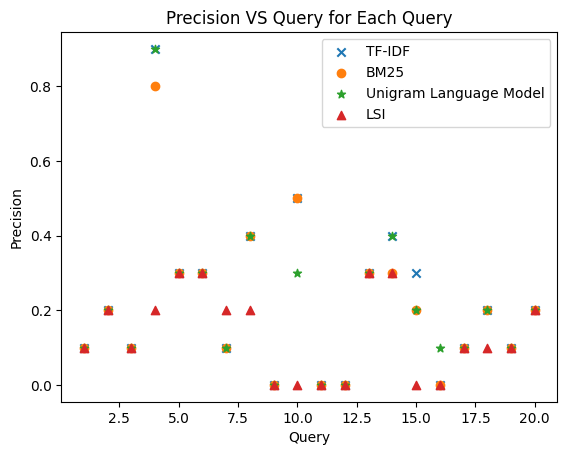

In [343]:
# For all queries, plot precision vs query for all 3 models
x = [i for i in range(1, len(tf_idf_precision)+1)]
y_tf_idf = [tf_idf_precision[i] for i in tf_idf_precision]
y_bm25 = [bm25_precision[i] for i in bm25_precision]
y_unigram = [unigram_precision[i] for i in unigram_precision]
y_lsi = [lsi_precision[i] for i in lsi_precision]

plt.scatter(x, y_tf_idf, label='TF-IDF', marker='x')
plt.scatter(x, y_bm25, label='BM25', marker='o')
plt.scatter(x, y_unigram, label='Unigram Language Model', marker='*')
plt.scatter(x, y_lsi, label='LSI', marker='^')

plt.xlabel('Query')
plt.ylabel('Precision')
plt.title('Precision VS Query for Each Query')

plt.legend()
plt.show()

**Recall VS Query**

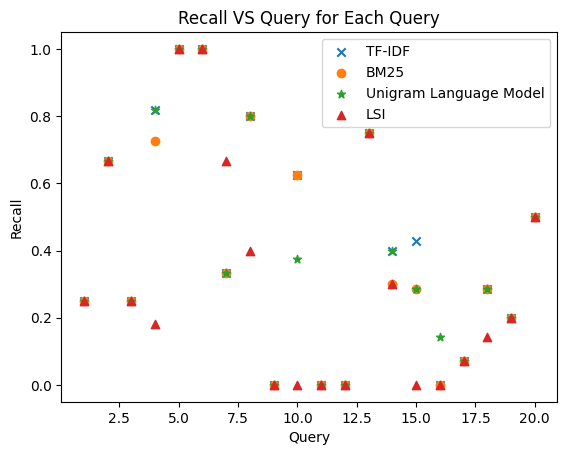

In [344]:
# For all queries, plot recall vs query for all 3 models
x = [i for i in range(1, len(tf_idf_recall)+1)]
y_tf_idf = [tf_idf_recall[i] for i in tf_idf_recall]
y_bm25 = [bm25_recall[i] for i in bm25_recall]
y_unigram = [unigram_recall[i] for i in unigram_recall]
y_lsi = [lsi_recall[i] for i in lsi_recall]

plt.scatter(x, y_tf_idf, label='TF-IDF', marker='x')
plt.scatter(x, y_bm25, label='BM25', marker='o')
plt.scatter(x, y_unigram, label='Unigram Language Model', marker='*')
plt.scatter(x, y_lsi, label='LSI', marker='^')

plt.xlabel('Query')
plt.ylabel('Recall')
plt.title('Recall VS Query for Each Query')

plt.legend()
plt.show()

**AP VS Query**

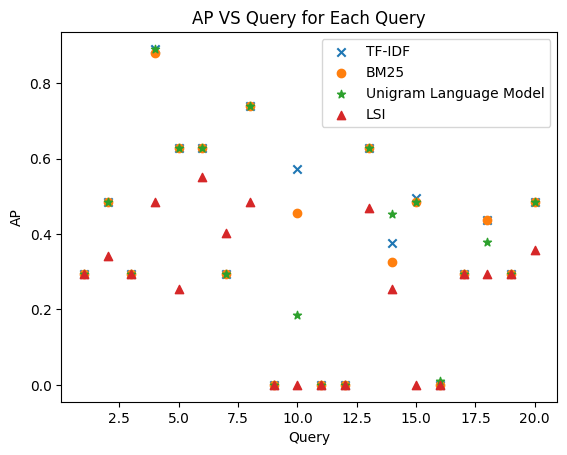

In [345]:
# For all queries, plot ap vs query for all 3 models
x = [i for i in range(1, len(tf_idf_ap)+1)]
y_tf_idf = [tf_idf_ap[i] for i in tf_idf_ap]
y_bm25 = [bm25_ap[i] for i in bm25_ap]
y_unigram = [unigram_ap[i] for i in unigram_ap]
y_lsi = [lsi_ap[i] for i in lsi_ap]

plt.scatter(x, y_tf_idf, label='TF-IDF', marker='x')
plt.scatter(x, y_bm25, label='BM25', marker='o')
plt.scatter(x, y_unigram, label='Unigram Language Model', marker='*')
plt.scatter(x, y_lsi, label='LSI', marker='^')

plt.xlabel('Query')
plt.ylabel('AP')
plt.title('AP VS Query for Each Query')

plt.legend()
plt.show()

**Execution Time VS Query**

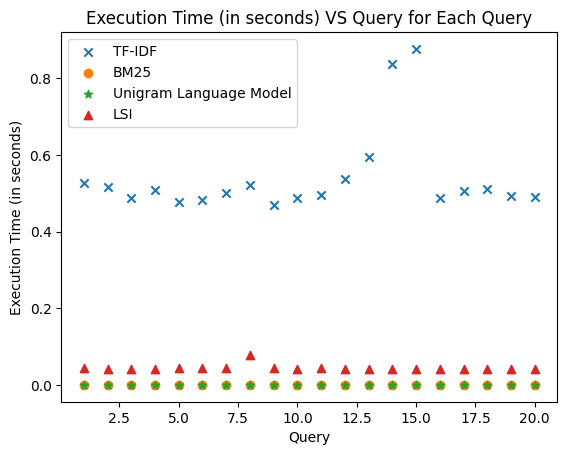

In [346]:
# For all queries, plot avg_time vs query for all 3 models
x = [i for i in range(1, len(tf_idf_avg_time)+1)]
y_tf_idf = [tf_idf_avg_time[i] for i in tf_idf_avg_time]
y_bm25 = [bm25_avg_time[i] for i in bm25_avg_time]
y_unigram = [unigram_avg_time[i] for i in unigram_avg_time]
y_lsi = [lsi_avg_time[i] for i in lsi_avg_time]

plt.scatter(x, y_tf_idf, label='TF-IDF', marker='x')
plt.scatter(x, y_bm25, label='BM25', marker='o')
plt.scatter(x, y_unigram, label='Unigram Language Model', marker='*')
plt.scatter(x, y_lsi, label='LSI', marker='^')

plt.xlabel('Query')
plt.ylabel('Execution Time (in seconds)')
plt.title('Execution Time (in seconds) VS Query for Each Query')

plt.legend()
plt.show()

### Comparing MAP

**Calculating MAP**

In [347]:
# Calculating MAP
def get_map(method_ap):
    return sum(method_ap.values())/len(method_ap)

In [348]:
tf_idf_map = get_map(tf_idf_ap)
bm25_map = get_map(bm25_ap)
unigram_map = get_map(unigram_ap)
lsi_map = get_map(lsi_ap)

In [349]:
tf_idf_map, bm25_map, unigram_map, lsi_map

(0.3915376984126984,
 0.38219047619047614,
 0.3731309523809524,
 0.25336309523809525)

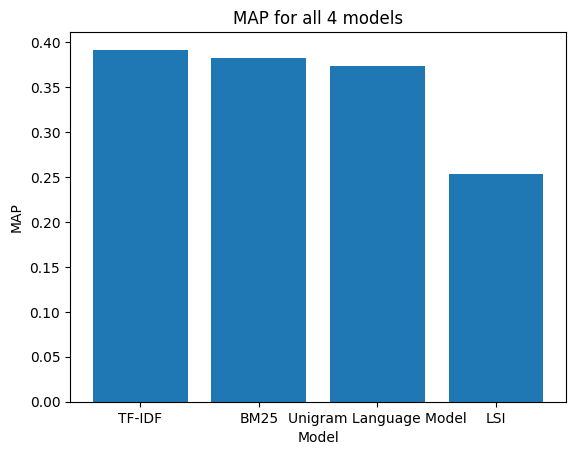

In [350]:
# Plotting MAP for all 3 models
x = ['TF-IDF', 'BM25', 'Unigram Language Model', 'LSI']
y = [tf_idf_map, bm25_map, unigram_map, lsi_map]

plt.bar(x, y)

plt.xlabel('Model')
plt.ylabel('MAP')
plt.title('MAP for all 4 models')

plt.show()